In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
df_stock= pd.read_csv('StockData.csv',dayfirst = True,encoding='latin1')

In [149]:
df_stock

,Unnamed: 0,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,0,2023-04-06,AAPL,163.785767,164.660004,164.960007,162.000000,162.429993,45390100.0
1,1,2023-04-06,GOOG,108.900002,108.900002,109.629997,104.815002,105.769997,34684200.0
2,2,2023-04-06,MSFT,289.226227,291.600006,292.079987,282.029999,283.209991,29770300.0
3,3,2023-04-06,NFLX,339.329987,339.329987,340.480011,332.630005,339.339996,4660500.0
4,4,2023-04-06,TSLA,185.059998,185.059998,186.389999,179.740005,183.080002,123857900.0
...,...,...,...,...,...,...,...,...,...
1245,1245,2024-04-04,AAPL,168.820007,168.820007,171.919998,168.820007,170.289993,53582300.0
1246,1246,2024-04-04,GOOG,151.940002,151.940002,156.179993,151.880005,155.080002,24114800.0
1247,1247,2024-04-04,MSFT,417.880005,417.880005,428.670013,417.570007,424.989990,19330000.0
1248,1248,2024-04-04,NFLX,617.140015,617.140015,638.000000,616.580017,633.210022,3062100.0


In [150]:
df_stock.columns= df_stock.columns.str.strip()

In [151]:
# Drops all columns whose name matches the regex '^Unnamed'
df_stock = df_stock.drop(df_stock.filter(regex='^Unnamed').columns, axis=1)

In [152]:
df_stock.head(5)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-04-06,AAPL,163.785767,164.660004,164.960007,162.000000,162.429993,45390100.0
1,2023-04-06,GOOG,108.900002,108.900002,109.629997,104.815002,105.769997,34684200.0
2,2023-04-06,MSFT,289.226227,291.600006,292.079987,282.029999,283.209991,29770300.0
3,2023-04-06,NFLX,339.329987,339.329987,340.480011,332.630005,339.339996,4660500.0
4,2023-04-06,TSLA,185.059998,185.059998,186.389999,179.740005,183.080002,123857900.0


In [153]:
df_stock.isna().sum()

Date         0
Ticker       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [154]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'],errors ="coerce")

In [155]:
df_stock.dropna(subset= 'Date')

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-04-06,AAPL,163.785767,164.660004,164.960007,162.000000,162.429993,45390100.0
1,2023-04-06,GOOG,108.900002,108.900002,109.629997,104.815002,105.769997,34684200.0
2,2023-04-06,MSFT,289.226227,291.600006,292.079987,282.029999,283.209991,29770300.0
3,2023-04-06,NFLX,339.329987,339.329987,340.480011,332.630005,339.339996,4660500.0
4,2023-04-06,TSLA,185.059998,185.059998,186.389999,179.740005,183.080002,123857900.0
...,...,...,...,...,...,...,...,...
1245,2024-04-04,AAPL,168.820007,168.820007,171.919998,168.820007,170.289993,53582300.0
1246,2024-04-04,GOOG,151.940002,151.940002,156.179993,151.880005,155.080002,24114800.0
1247,2024-04-04,MSFT,417.880005,417.880005,428.670013,417.570007,424.989990,19330000.0
1248,2024-04-04,NFLX,617.140015,617.140015,638.000000,616.580017,633.210022,3062100.0


In [156]:
df_stock.dtypes

Date         datetime64[ns]
Ticker               object
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume              float64
dtype: object

In [157]:
price_cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
df_stock= df_stock.dropna(subset = price_cols)

In [158]:
df_stock[price_cols].isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [159]:
df_stock = df_stock[df_stock["Ticker"].astype(str).str.len() > 0]
df_stock["Ticker"].unique()

array(['AAPL', 'GOOG', 'MSFT', 'NFLX', 'TSLA'], dtype=object)

In [160]:
# Order the data by Ticker, then Date
df_stock = df_stock.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)

# Final preview
df_stock.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-04-06,AAPL,163.785767,164.660004,164.960007,162.000000,162.429993,45390100.0
1,2023-04-10,AAPL,161.169724,162.029999,162.029999,160.080002,161.419998,47716900.0
2,2023-04-11,AAPL,159.946259,160.800003,162.360001,160.509995,162.350006,47644200.0
3,2023-04-12,AAPL,159.249985,160.100006,162.059998,159.779999,161.220001,50133100.0
4,2023-04-13,AAPL,164.680969,165.559998,165.800003,161.419998,161.630005,68445600.0


In [161]:
!pip install yfinance --quiet

import yfinance as yf
from datetime import datetime
import time

In [162]:
original = ["AAPL","GOOG","MSFT","NFLX","TSLA"]  
extra = [ "AMC", "GME", "COIN", "RIOT", "DKNG",  "UBER", "PLTR", "CLOV", "RBLX", "FSLY", "SNAP","TLRY","BYND","NKLA", "BB",   "FUBO", "CCL",   "UAL",
    "DAL",  
    "DIS"]
tickers = [
    "AAPL","GOOG","MSFT","NFLX","TSLA",
    "AMC","GME","COIN","RIOT","DKNG",
    "UBER","PLTR","CLOV","RBLX","FSLY"
]
len(tickers)  

15

In [163]:
!pip install pandas-datareader

### Downloading historical stock data with pandas_datareader

In [180]:
import pandas as pd
from pandas_datareader import data as pdr

tickers = ["AAPL","GOOG","MSFT","NFLX","TSLA","AMC","GME","COIN","RIOT","DKNG","UBER", "PLTR", "CLOV", "RBLX", "FSLY", "SNAP","TLRY","BYND","NKLA", "BB",   "FUBO", "CCL",   "UAL",
    "DAL",  
    "DIS"]
start = "2023-04-06"
end   = pd.Timestamp.today().strftime("%Y-%m-%d")

all_dfs = []
failed = []

for tk in tickers:
    print(f"→ Attempting {tk}…")
    try:
        df = pdr.DataReader(tk, "stooq", start, end)
    except Exception as e:
        print(f"   ❌ Failed {tk}: {e}")
        failed.append(tk)
        continue

    # Stooq returns newest first—reorder, tag, and store
    df = df.sort_index().reset_index()
    df["Ticker"] = tk
    all_dfs.append(df)
    print(f"   ✅ Fetched {tk}, {len(df)} rows")


print("Failed tickers: ", failed)

# Finally concatenate and inspect
if all_dfs:
    full = pd.concat(all_dfs, ignore_index=True)
    display(full.head())
else:
    print("No data fetched—check your tickers or try another data source.")

→ Attempting AAPL…
   ✅ Fetched AAPL, 587 rows
→ Attempting GOOG…
   ✅ Fetched GOOG, 587 rows
→ Attempting MSFT…
   ✅ Fetched MSFT, 587 rows
→ Attempting NFLX…
   ✅ Fetched NFLX, 587 rows
→ Attempting TSLA…
   ✅ Fetched TSLA, 587 rows
→ Attempting AMC…
   ✅ Fetched AMC, 587 rows
→ Attempting GME…
   ✅ Fetched GME, 587 rows
→ Attempting COIN…
   ✅ Fetched COIN, 587 rows
→ Attempting RIOT…
   ✅ Fetched RIOT, 587 rows
→ Attempting DKNG…
   ✅ Fetched DKNG, 587 rows
→ Attempting UBER…
   ✅ Fetched UBER, 587 rows
→ Attempting PLTR…
   ✅ Fetched PLTR, 587 rows
→ Attempting CLOV…
   ✅ Fetched CLOV, 587 rows
→ Attempting RBLX…
   ✅ Fetched RBLX, 587 rows
→ Attempting FSLY…
   ✅ Fetched FSLY, 587 rows
→ Attempting SNAP…
   ✅ Fetched SNAP, 587 rows
→ Attempting TLRY…
   ✅ Fetched TLRY, 587 rows
→ Attempting BYND…
   ✅ Fetched BYND, 587 rows
→ Attempting NKLA…
   ✅ Fetched NKLA, 0 rows
→ Attempting BB…
   ✅ Fetched BB, 587 rows
→ Attempting FUBO…
   ✅ Fetched FUBO, 587 rows
→ Attempting CCL…
   ✅ 

,Date,Open,High,Low,Close,Volume,Ticker,No data
0,2023-04-06,160.808,163.313,160.382,163.016,45847869.0,AAPL,NaN
1,2023-04-10,159.809,160.412,158.481,160.412,48198093.0,AAPL,NaN
2,2023-04-11,160.729,160.739,158.907,159.194,48124695.0,AAPL,NaN
3,2023-04-12,159.610,160.442,158.185,158.501,50638640.0,AAPL,NaN
4,2023-04-13,160.016,164.146,159.809,163.907,69135904.0,AAPL,NaN


In [182]:
full = pd.concat(all_dfs, ignore_index=True)
print("Unique tickers fetched:", full["Ticker"].unique())

Unique tickers fetched: ['AAPL' 'GOOG' 'MSFT' 'NFLX' 'TSLA' 'AMC' 'GME' 'COIN' 'RIOT' 'DKNG'
 'UBER' 'PLTR' 'CLOV' 'RBLX' 'FSLY' 'SNAP' 'TLRY' 'BYND' 'BB' 'FUBO' 'CCL'
 'UAL' 'DAL' 'DIS']


In [183]:
# 1) Rename Close → Adj Close
full = full.rename(columns={"Close": "Adj Close"})

# 2) If you want both Close and Adj Close exactly as in the original:
#    (Stooq's Close is already adjusted, so we'll just duplicate it)
full["Close"] = full["Adj Close"]

# 3) Subset & reorder columns to match your original dataset:
#    ['Date','Ticker','Adj Close','Close','High','Low','Open','Volume']
cols = ["Date","Ticker","Adj Close","Close","High","Low","Open","Volume"]
full = full[cols]

# 4) (Optional) Sort & reset index
full = full.sort_values(["Ticker","Date"]).reset_index(drop=True)

# 5) Verify it matches the original schema
print(full.columns.tolist())
# ['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# 6) Take a peek
full.head()

['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']


,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-04-06,AAPL,163.016,163.016,163.313,160.382,160.808,45847869.0
1,2023-04-10,AAPL,160.412,160.412,160.412,158.481,159.809,48198093.0
2,2023-04-11,AAPL,159.194,159.194,160.739,158.907,160.729,48124695.0
3,2023-04-12,AAPL,158.501,158.501,160.442,158.185,159.610,50638640.0
4,2023-04-13,AAPL,163.907,163.907,164.146,159.809,160.016,69135904.0


In [184]:
full.shape

(14088, 8)

### Generating random portfolios based on Ticker Universe

In [186]:
import numpy as np

# Suppose you already have your cleaned DataFrame `df`
tickers = full["Ticker"].unique()
num_portfolios = 500

portfolios = {}
for i in range(num_portfolios):
    # pick a random desired size between 3 and 6
    desired_size = np.random.randint(3, 6)
    # clamp so we never ask for more tickers than exist
    k = min(desired_size, len(tickers))
    portfolios[f"P{i+1}"] = np.random.choice(
        tickers,
        size=k,
        replace=False
    ).tolist()

# Now print the first 5 portfolios to confirm
for pid, assets in list(portfolios.items())[:100]:
    print(f"{pid}: {assets}")

P1: ['BYND', 'GOOG', 'NFLX', 'TLRY', 'RIOT']
P2: ['FUBO', 'PLTR', 'AMC', 'CLOV', 'BYND']
P3: ['PLTR', 'BB', 'DAL', 'FUBO', 'TSLA']
P4: ['UAL', 'MSFT', 'UBER', 'AMC']
P5: ['FSLY', 'MSFT', 'DAL', 'DKNG']
P6: ['GME', 'MSFT', 'TSLA', 'TLRY', 'COIN']
P7: ['GOOG', 'CLOV', 'CCL', 'PLTR', 'NFLX']
P8: ['COIN', 'UAL', 'TLRY']
P9: ['SNAP', 'FUBO', 'PLTR', 'FSLY']
P10: ['RBLX', 'SNAP', 'PLTR', 'FSLY']
P11: ['UAL', 'RBLX', 'NFLX', 'UBER']
P12: ['UAL', 'FUBO', 'CCL', 'BYND', 'TLRY']
P13: ['CCL', 'UAL', 'RIOT', 'DKNG']
P14: ['GME', 'AMC', 'GOOG']
P15: ['TSLA', 'NFLX', 'BYND', 'BB']
P16: ['DIS', 'DAL', 'AMC', 'BB']
P17: ['NFLX', 'CLOV', 'PLTR', 'FSLY']
P18: ['RBLX', 'UAL', 'CLOV', 'BYND', 'DIS']
P19: ['PLTR', 'CLOV', 'UBER', 'DKNG']
P20: ['AMC', 'COIN', 'FSLY', 'DKNG', 'TLRY']
P21: ['DAL', 'AAPL', 'PLTR', 'UAL']
P22: ['UAL', 'TSLA', 'BYND', 'AAPL', 'CCL']
P23: ['MSFT', 'UBER', 'AMC', 'TLRY', 'CCL']
P24: ['TLRY', 'AMC', 'GOOG', 'BYND']
P25: ['DAL', 'FUBO', 'NFLX', 'TSLA', 'DKNG']
P26: ['DKNG', 'UAL', '

### Creating Synthetic Portfolios and Computing Portfolio‐Level Features

In [188]:
import random
tickers = full["Ticker"].unique().tolist()
num_portfolios = 100
portfolios = {}
for i in range(num_portfolios):
    k = random.randint(3,5)
    portfolios[f"P{i+1}"] = random.sample(tickers, k)

records = []
for pid, assets in portfolios.items():
    sub = full[full["Ticker"].isin(assets)]
    prices = sub.pivot(index="Date", columns="Ticker", values="Adj Close")

    avg_ret = prices.pct_change().mean(axis=1)
    roll_vol = prices.pct_change().std(axis=1).rolling(5, min_periods=1).mean()
    weights = prices.div(prices.sum(axis=1), axis=0)
    conc = weights.max(axis=1)

    for date in prices.index:
        records.append({"Portfolio": pid,"Date": date,"Avg_Return": avg_ret.loc[date],"Rolling_Volatility": roll_vol.loc[date],
                        "Concentration": conc.loc[date], "Num_Assets": len(assets)})
portfolio_df = pd.DataFrame(records)
portfolio_df = portfolio_df.sort_values(["Portfolio","Date"]).reset_index(drop=True)

#  Label anomalies
thr = portfolio_df["Rolling_Volatility"].quantile(0.95)
portfolio_df["Anomaly"] = (portfolio_df["Rolling_Volatility"] > thr).astype(int)

print("Columns in portfolio_df:", portfolio_df.columns.tolist())
portfolio_df.head()

Columns in portfolio_df: ['Portfolio', 'Date', 'Avg_Return', 'Rolling_Volatility', 'Concentration', 'Num_Assets', 'Anomaly']


,Portfolio,Date,Avg_Return,Rolling_Volatility,Concentration,Num_Assets,Anomaly
0,P1,2023-04-06,NaN,NaN,0.691868,5,0
1,P1,2023-04-10,0.040933,0.070910,0.680344,5,1
2,P1,2023-04-11,0.053216,0.071823,0.667799,5,1
3,P1,2023-04-12,-0.032815,0.059228,0.670875,5,1
4,P1,2023-04-13,0.042751,0.055031,0.672865,5,1


In [189]:
portfolio_df.shape

(58700, 7)

In [190]:
portfolio_df.isna().sum()

Portfolio               0
Date                    0
Avg_Return            100
Rolling_Volatility    100
Concentration           0
Num_Assets              0
Anomaly                 0
dtype: int64

In [191]:
# 1. Fill missing Avg_Return and Rolling_Volatility with zero
portfolio_df['Avg_Return'].fillna(0, inplace=True)
portfolio_df['Rolling_Volatility'].fillna(0, inplace=True)

# 2. (Optional) Verify there are no more NaNs
print(portfolio_df[['Avg_Return','Rolling_Volatility']].isna().sum())

Avg_Return            0
Rolling_Volatility    0
dtype: int64


/var/folders/dd/wj7mp0fn2430wm60sqv1wl_w0000gn/T/ipykernel_69184/2968159128.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  portfolio_df['Avg_Return'].fillna(0, inplace=True)
/var/folders/dd/wj7mp0fn2430wm60sqv1wl_w0000gn/T/ipykernel_69184/2968159128.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [192]:
portfolio_df.isna().sum()

Portfolio             0
Date                  0
Avg_Return            0
Rolling_Volatility    0
Concentration         0
Num_Assets            0
Anomaly               0
dtype: int64

In [193]:
# Drop any exact duplicates
before = len(portfolio_df)
portfolio_df.drop_duplicates(inplace=True)
print(f"Dropped {before - len(portfolio_df)} duplicate rows")

Dropped 0 duplicate rows


In [194]:
portfolio_df.sort_values(['Portfolio','Date'], inplace=True)
portfolio_df.reset_index(drop=True, inplace=True)

In [195]:
# Flag extreme values for manual review
extreme = portfolio_df[
    (portfolio_df['Avg_Return'].abs() > 1) |
    (portfolio_df['Rolling_Volatility'] > 1)
]
print("Extreme outliers:\n", extreme.head())

Extreme outliers:
 Empty DataFrame
Columns: [Portfolio, Date, Avg_Return, Rolling_Volatility, Concentration, Num_Assets, Anomaly]
Index: []


In [196]:
# Clip returns to ±100% and vol to [0,200%]
portfolio_df['Avg_Return'] = portfolio_df['Avg_Return'].clip(-1,1)
portfolio_df['Rolling_Volatility'] = portfolio_df['Rolling_Volatility'].clip(0,2)

In [197]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
portfolio_df[['Avg_Return','Rolling_Volatility','Concentration','Num_Assets']] = \
    scaler.fit_transform(portfolio_df[['Avg_Return','Rolling_Volatility','Concentration','Num_Assets']])

In [198]:
portfolio_df.tail()

,Portfolio,Date,Avg_Return,Rolling_Volatility,Concentration,Num_Assets,Anomaly
58695,P99,2025-08-04,1.036655,-0.372826,1.092176,1.155262,0
58696,P99,2025-08-05,-0.194079,-0.464968,1.078217,1.155262,0
58697,P99,2025-08-06,-1.219420,0.336006,1.099367,1.155262,0
58698,P99,2025-08-07,0.461325,0.873017,1.097172,1.155262,0
58699,P99,2025-08-08,-0.587734,1.036974,1.103010,1.155262,0


In [199]:
portfolio_df.describe

<bound method NDFrame.describe of       Portfolio       Date  Avg_Return  Rolling_Volatility  Concentration  \
0            P1 2023-04-06   -0.050647           -1.607533       0.163022   
1            P1 2023-04-10    1.334296            2.378002       0.093118   
2            P1 2023-04-11    1.749876            2.429370       0.017028   
3            P1 2023-04-12   -1.160896            1.721424       0.035682   
4            P1 2023-04-13    1.395776            1.485557       0.047756   
...         ...        ...         ...                 ...            ...   
58695       P99 2025-08-04    1.036655           -0.372826       1.092176   
58696       P99 2025-08-05   -0.194079           -0.464968       1.078217   
58697       P99 2025-08-06   -1.219420            0.336006       1.099367   
58698       P99 2025-08-07    0.461325            0.873017       1.097172   
58699       P99 2025-08-08   -0.587734            1.036974       1.103010   

       Num_Assets  Anomaly  
0        1.1

In [200]:
print(portfolio_df['Anomaly'].value_counts())


Anomaly
0    55770
1     2930
Name: count, dtype: int64


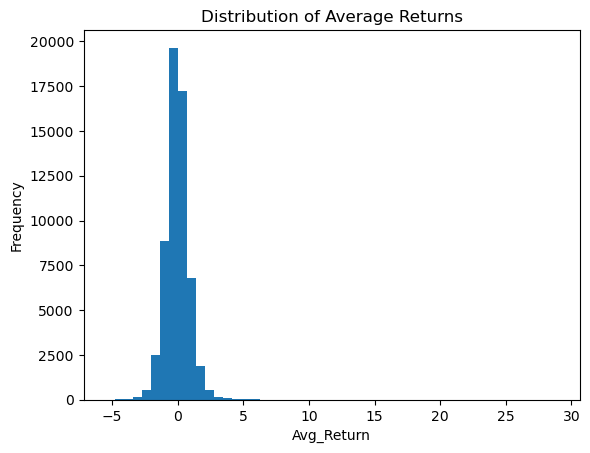

In [201]:
plt.figure()
plt.hist(portfolio_df['Avg_Return'], bins=50)
plt.title("Distribution of Average Returns")
plt.xlabel("Avg_Return")
plt.ylabel("Frequency")
plt.show()

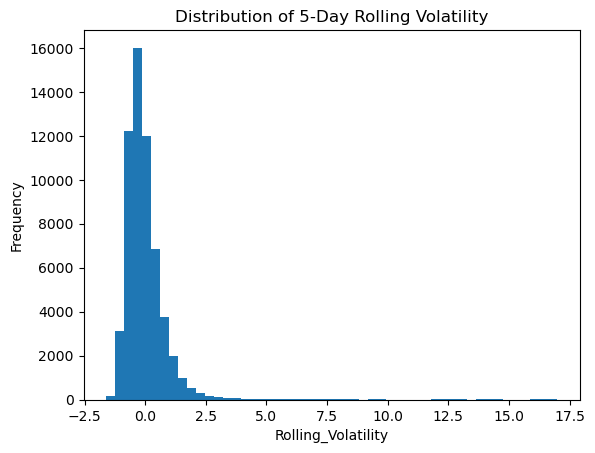

In [202]:
plt.figure()
plt.hist(portfolio_df['Rolling_Volatility'], bins=50)
plt.title("Distribution of 5-Day Rolling Volatility")
plt.xlabel("Rolling_Volatility")
plt.ylabel("Frequency")
plt.show()

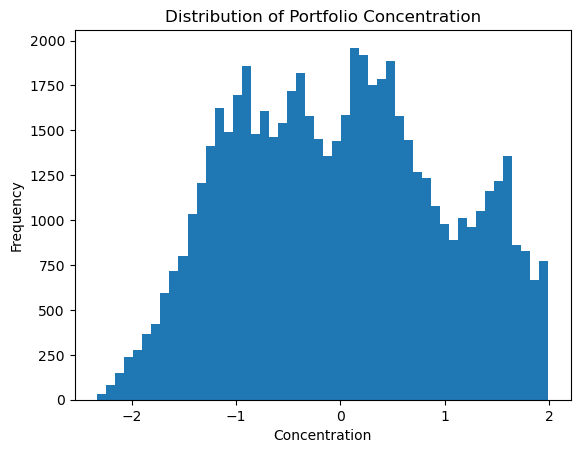

In [203]:
plt.figure()
plt.hist(portfolio_df['Concentration'], bins=50)
plt.title("Distribution of Portfolio Concentration")
plt.xlabel("Concentration")
plt.ylabel("Frequency")
plt.show()

### Preparing Sliding Windows of Time-Series Data for LSTM Training

In [205]:
!pip install torch torchvision torchaudio --quiet

In [206]:
import torch

In [207]:
from torch.utils.data import Dataset, DataLoader

In [208]:
portfolio_df.sort_values(["Portfolio","Date"], inplace=True)

In [209]:
feature_cols = ["Avg_Return","Rolling_Volatility","Concentration","Num_Assets"]
seq_len = 20   # e.g. use the last 20 days to predict today

# 4) Build sliding windows of (seq_len → features) and labels
X, y = [], []
for pid, group in portfolio_df.groupby("Portfolio"):
    vals = group[feature_cols].values        # shape [T, F]
    labs = group["Anomaly"].values           # shape [T]
    for i in range(len(vals) - seq_len):
        X.append(vals[i : i + seq_len])      # window of 20 days
        y.append(labs[i + seq_len])          # label is the day AFTER the window

X = np.stack(X)  # [num_samples, seq_len, num_features]
y = np.array(y)  # [num_samples]

print("Sequences:", X.shape, "Labels:", y.shape)


Sequences: (56700, 20, 4) Labels: (56700,)


In [210]:
# 5) Split into train / test (e.g. 80/20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 6) Wrap in a PyTorch Dataset
class PortfolioSeqDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = PortfolioSeqDataset(X_train, y_train)
test_ds  = PortfolioSeqDataset(X_test, y_test)


In [211]:
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=32)

# 8) Quick sanity check
bx, by = next(iter(train_loader))
print("Batch X:", bx.shape)   # (32, 20, 4)
print("Batch y:", by.shape)   # (32,)

Batch X: torch.Size([32, 20, 4])
Batch y: torch.Size([32])


### Defining and Initializing the LSTM Classifier Architecture

In [213]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1) Define a simple LSTM classifier
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers>1 else 0
        )
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # x: [batch, seq_len, features]
        _, (h_n, _) = self.lstm(x)
        out = h_n[-1]             # take last layer’s hidden state
        return self.fc(out)       # [batch, num_classes]


In [214]:
# 2) Hyperparameters
input_size  = 4     # features per time‐step
hidden_size = 64
num_layers  = 1
num_classes = 2     # normal vs anomaly
lr          = 1e-3
epochs      = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model  = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [215]:
# 3) Training & validation loop
for epoch in range(1, epochs+1):
    # — Training —
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * X_batch.size(0)
        preds = outputs.argmax(dim=1)
        train_correct += (preds == y_batch).sum().item()
        train_total += y_batch.size(0)
    
    train_loss /= train_total
    train_acc = train_correct / train_total

In [216]:
 # — Validation —
model.eval()
val_correct = 0
val_total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            preds = outputs.argmax(dim=1)
            val_correct += (preds == y_batch).sum().item()
            val_total += y_batch.size(0)
    val_acc = val_correct / val_total
    
    print(f"Epoch {epoch}/{epochs} — "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Acc: {val_acc:.4f}")

Epoch 10/10 — Train Loss: 0.0592, Train Acc: 0.9811, Val Acc: 0.9824


In [217]:
# In a notebook cell (note the URL targets your local torch version)
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric \
  -f https://data.pyg.org/whl/torch-$(python -c "import torch; print(torch.__version__)")+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.7.1+cpu.html


### Preparing Graph Data and Node Features for the GCN Branch

In [219]:
# 2) Then import the main classes in your Python cell
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# Quick check
print("PyTorch version:", torch.__version__)
print("torch_geometric data & GCNConv imported successfully")

PyTorch version: 2.7.1
torch_geometric data & GCNConv imported successfully


In [220]:
import itertools
# --- 1) Create node features for the GNN from the LSTM hidden states ---

# We’ll run each portfolio’s full sequence through the LSTM and grab its last hidden state.
# First, collect one long sequence per portfolio:
feature_cols = ["Avg_Return","Rolling_Volatility","Concentration","Num_Assets"]
seq_len = 20

# Map portfolio IDs to consecutive node indices 0…99
pid2idx = {pid: i for i,pid in enumerate(sorted(portfolios))}

# Build a tensor of shape [num_nodes, seq_len, features]
node_seqs = torch.zeros(len(portfolios), seq_len, len(feature_cols))
for pid, group in portfolio_df.groupby("Portfolio"):
    idx = pid2idx[pid]
    vals = group[feature_cols].values
    # take the last seq_len rows
    node_seqs[idx] = torch.tensor(vals[-seq_len:], dtype=torch.float32)

# Pass through LSTM to get hidden embeddings
model.eval()
with torch.no_grad():
    # lstm_out shape [nodes, seq_len, hidden_size]; h_n shape [num_layers, nodes, hidden_size]
    _, (h_n, _) = model.lstm(node_seqs.to(device))
    lstm_embeddings = h_n[-1].cpu()   # [100, hidden_size]

# --- 2) Build the portfolio‐graph edge_index based on shared tickers ---

edges = []
for (p1,a1),(p2,a2) in itertools.combinations(portfolios.items(),2):
    if set(a1) & set(a2):  # if they share at least one ticker
        i,j = pid2idx[p1], pid2idx[p2]
        edges.append((i,j))
        edges.append((j,i))

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()  # [2, E]

# --- 3) Wrap into a PyG Data object ---

data = Data(
    x=lstm_embeddings,   # use LSTM embeddings as initial node features
    edge_index=edge_index
)

# --- 4) Define & run a 2‐layer GCN to get final node representations ---

class GCNBranch(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats, dropout=0.2):
        super().__init__()
        self.conv1 = GCNConv(in_feats, hidden_feats)
        self.conv2 = GCNConv(hidden_feats, out_feats)
        self.drop  = dropout

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = nn.functional.dropout(x, p=self.drop, training=self.training)
        return self.conv2(x, edge_index)

gcn = GCNBranch(
    in_feats=lstm_embeddings.size(1),
    hidden_feats=32,
    out_feats=16
).to(device)

with torch.no_grad():
    gcn_embeddings = gcn(data.x.to(device), data.edge_index.to(device)).cpu()  # [100,16]

#  Fuse LSTM + GCN embeddings and classify 

# Concatenate per‐node features (now [100, hidden_size+16])
fusion = torch.cat([lstm_embeddings, gcn_embeddings], dim=1)

# Final classifier
classifier = nn.Sequential(
    nn.Linear(fusion.size(1), 32),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(32, 2)
).to(device)

# Example forward
out = classifier(fusion.to(device))  # [100,2] node‐level logits
print("Fused logits shape:", out.shape)

Fused logits shape: torch.Size([100, 2])


In [221]:
# 1) Recompute the fused logits from the classifier
classifier.eval()
with torch.no_grad():
    out_logits = classifier(fusion.to(device))  # torch.Size([100,2])
# 2) Move to CPU and convert to NumPy
fused_logits_np = out_logits.cpu().numpy()     # shape (100,2)

print("fused_logits_np shape:", fused_logits_np.shape)

fused_logits_np shape: (100, 2)


In [222]:
label_series = portfolio_df.groupby("Portfolio")["Anomaly"].max()
sorted_pids  = sorted(portfolios)
true_labels  = label_series.loc[sorted_pids].values  # shape (100,)

# 1) Compute anomaly probabilities
exp_logits    = np.exp(fused_logits_np)
probs         = exp_logits / exp_logits.sum(axis=1, keepdims=True)
anomaly_probs = probs[:, 1]



In [223]:
import torch.nn as nn
import torch.optim as optim

# Assume you already have:
#   fusion       : torch.Tensor of shape [100, fusion_dim]
#   true_labels  : NumPy array or torch.LongTensor of shape [100]
#   device       : "cpu" or "cuda"

# 1) Convert true_labels to a torch.LongTensor on the correct device
if not isinstance(true_labels, torch.Tensor):
    y = torch.tensor(true_labels, dtype=torch.long, device=device)
else:
    y = true_labels.to(device)

# 2) Define the fusion‐classifier (fresh weights)
classifier = nn.Sequential(
    nn.Linear(fusion.size(1), 32),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(32, 2)
).to(device)

# 3) Build class‐imbalance weights as float32
num_norm = (y == 0).sum().item()
num_anom = (y == 1).sum().item()
w0, w1   = 1.0, num_norm / max(num_anom, 1)
weight   = torch.tensor([w0, w1], dtype=torch.float32, device=device)

# 4) Loss & optimizer
criterion = nn.CrossEntropyLoss(weight=weight)
optimizer = optim.Adam(classifier.parameters(), lr=1e-3)

# 5) Train the classifier on the 100 fused embeddings
classifier.train()
for epoch in range(1, 21):
    optimizer.zero_grad()
    logits = classifier(fusion.to(device))   # [100,2]
    loss   = criterion(logits, y)            # now weight is float32
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        preds = logits.argmax(dim=1)
        acc   = (preds == y).float().mean().item()
    print(f"Epoch {epoch:02d} — Loss: {loss.item():.4f}, Train Acc: {acc:.3f}")

# 6) Final evaluation
classifier.eval()
with torch.no_grad():
    logits = classifier(fusion.to(device))
    probs  = torch.softmax(logits, dim=1)[:, 1]
    preds  = (probs > 0.5).long().cpu().numpy()

from sklearn.metrics import classification_report
print("\nClassification Report:\n")
print(classification_report(
    true_labels, preds,
    target_names=["Normal","Anomaly"],
    zero_division=0
))

Epoch 01 — Loss: 0.6947, Train Acc: 0.090
Epoch 02 — Loss: 0.6837, Train Acc: 0.190
Epoch 03 — Loss: 0.6935, Train Acc: 0.180
Epoch 04 — Loss: 0.6772, Train Acc: 0.220
Epoch 05 — Loss: 0.6830, Train Acc: 0.290
Epoch 06 — Loss: 0.6885, Train Acc: 0.300
Epoch 07 — Loss: 0.6737, Train Acc: 0.360
Epoch 08 — Loss: 0.6762, Train Acc: 0.420
Epoch 09 — Loss: 0.6801, Train Acc: 0.370
Epoch 10 — Loss: 0.6610, Train Acc: 0.440
Epoch 11 — Loss: 0.6649, Train Acc: 0.420
Epoch 12 — Loss: 0.6761, Train Acc: 0.420
Epoch 13 — Loss: 0.6737, Train Acc: 0.430
Epoch 14 — Loss: 0.6642, Train Acc: 0.440
Epoch 15 — Loss: 0.6606, Train Acc: 0.420
Epoch 16 — Loss: 0.6648, Train Acc: 0.490
Epoch 17 — Loss: 0.6480, Train Acc: 0.450
Epoch 18 — Loss: 0.6618, Train Acc: 0.480
Epoch 19 — Loss: 0.6472, Train Acc: 0.530
Epoch 20 — Loss: 0.6427, Train Acc: 0.480

Classification Report:

              precision    recall  f1-score   support

      Normal       0.11      1.00      0.19         6
     Anomaly       1.00   

### Aggregating Portfolio‐Level Features and Training the XGBoost Baseline

In [225]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Prepare per-portfolio aggregated features (same as before)
agg = portfolio_df.groupby("Portfolio").agg({
    'Avg_Return': ['mean','std'],
    'Rolling_Volatility': ['mean','std'],
    'Concentration': ['mean','std'],
    'Num_Assets': 'mean'
})
agg.columns = ['_'.join(c) for c in agg.columns]
pids = sorted(portfolios)
X = agg.loc[pids].values
y = pd.Series(portfolio_df.groupby("Portfolio")["Anomaly"].max(), index=pids).values

# Fixed train/test split
np.random.seed(42)
idx = np.arange(len(pids))
np.random.shuffle(idx)
split = int(0.8 * len(idx))
train_idx, test_idx = idx[:split], idx[split:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Evaluate
y_pred = xgb.predict(X_test)
print("XGBoost Baseline:\n", classification_report(y_test, y_pred, target_names=["Normal","Anomaly"]))

XGBoost Baseline:
               precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         1
     Anomaly       0.95      1.00      0.97        19

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarni

### Plotting the ROC Curve and Selecting Youden’s J Optimal Threshold

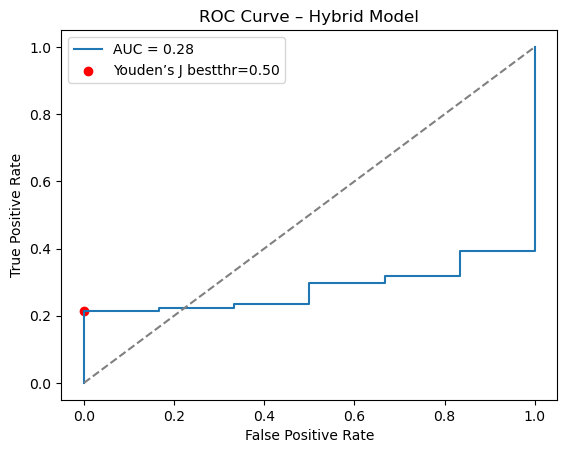

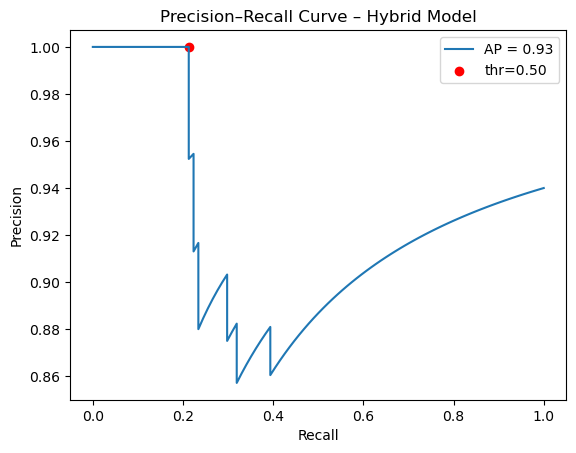

Chosen optimal threshold = 0.502


In [227]:
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)

# 1) Compute anomaly probabilities
exp_logits    = np.exp(fused_logits_np)
probs         = exp_logits / exp_logits.sum(axis=1, keepdims=True)
anomaly_probs = probs[:,1]

# 2) ROC‐AUC & Youden’s J
fpr, tpr, roc_th = roc_curve(true_labels, anomaly_probs)
roc_auc = auc(fpr, tpr)
youden  = tpr - fpr
best_idx = np.argmax(youden)
best_thr = roc_th[best_idx]

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], '--', color='gray')
plt.scatter(fpr[best_idx], tpr[best_idx], color='red',
            label=f"Youden’s J bestthr={best_thr:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Hybrid Model")
plt.legend()
plt.show()

# 3) Precision–Recall & Average Precision
precision, recall, pr_th = precision_recall_curve(true_labels, anomaly_probs)
ap = average_precision_score(true_labels, anomaly_probs)

plt.figure()
plt.plot(recall, precision, label=f"AP = {ap:.2f}")
# mark threshold closest to best_thr
closest = np.argmin(np.abs(pr_th - best_thr))
plt.scatter(recall[closest], precision[closest], color='red',
            label=f"thr={best_thr:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Hybrid Model")
plt.legend()
plt.show()

print(f"Chosen optimal threshold = {best_thr:.3f}")

In [228]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# 1) Use the same per‐portfolio aggregate features
X = agg.loc[pids].values  # shape [100,7] from earlier
y = true_labels           # shape [100,]

# 2) Fit an Isolation Forest on the train split only
iso = IsolationForest(contamination=0.09, random_state=42)
iso.fit(X[train_idx])

# 3) Get anomaly scores / predictions on test split
#    predict() returns 1 for normal, -1 for anomaly
iso_pred = iso.predict(X[test_idx])
iso_pred = np.where(iso_pred == -1, 1, 0)  # convert to 0/1

# 4) Evaluate
print("Isolation Forest Baseline:\n",
      classification_report(y[test_idx], iso_pred,
                            target_names=["Normal","Anomaly"],
                            zero_division=0))

Isolation Forest Baseline:
               precision    recall  f1-score   support

      Normal       0.07      1.00      0.12         1
     Anomaly       1.00      0.26      0.42        19

    accuracy                           0.30        20
   macro avg       0.53      0.63      0.27        20
weighted avg       0.95      0.30      0.40        20



In [229]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1) Define a helper
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy" : accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall"   : recall_score(y_true, y_pred, zero_division=0),
        "F1"       : f1_score(y_true, y_pred, zero_division=0),
    }

# 2) XGBoost baseline metrics
#    you ran: y_pred = xgb.predict(X_test)
xgb_metrics = compute_metrics(y_test, y_pred)

# Let’s store those in clearly named variables for the summary:
hybrid_preds_full = preds                # full 100-long array
hybrid_preds      = preds[test_idx]      # only on test portfolios

# Now you can compute metrics exactly as for XGBoost and Isolation Forest:
hybrid_at_50_metrics = compute_metrics(y_test, hybrid_preds)


# 4) Isolation Forest metrics
#    iso_pred is already 0/1 on X_test
iso_metrics = compute_metrics(y_test, iso_pred)

# 5) Assemble into a DataFrame
results = {
    "XGBoost":      xgb_metrics,
    "Hybrid @0.50": hybrid_at_50_metrics,
    "Isolation":    iso_metrics
}

df_summary = pd.DataFrame(results).T
print(df_summary)

              Accuracy  Precision    Recall        F1
XGBoost           0.95       0.95  1.000000  0.974359
Hybrid @0.50      0.60       1.00  0.578947  0.733333
Isolation         0.30       1.00  0.263158  0.416667


In [230]:
new_thr = 0.35   # example lower than 0.49
hybrid_new_preds_full = (anomaly_probs > new_thr).astype(int)
hybrid_new_preds = hybrid_new_preds_full[test_idx]
new_metrics = compute_metrics(y_test, hybrid_new_preds)
print("Hybrid @0.35 →", new_metrics)

Hybrid @0.35 → {'Accuracy': 0.95, 'Precision': 0.95, 'Recall': 1.0, 'F1': 0.9743589743589743}


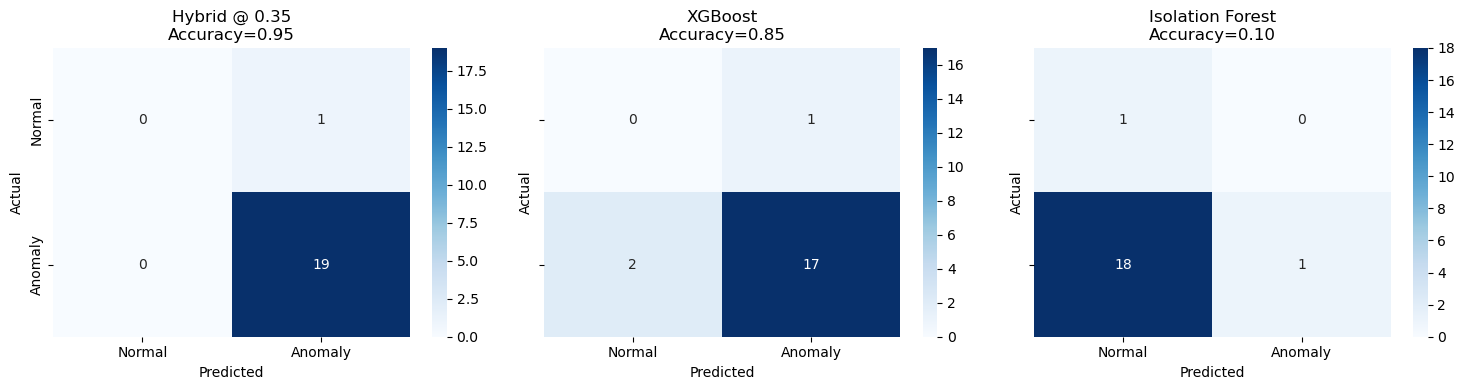

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# 1) Define your fixed hybrid threshold
new_thr = 0.35
hybrid_thresh_preds_full = (anomaly_probs > new_thr).astype(int)

# 3) Extract only the test‐set predictions
#    test_idx: array of indices for your test portfolios
hybrid_test_preds = hybrid_thresh_preds_full[test_idx]
xgb_test_preds    = xgb_preds_full[test_idx]
iso_test_preds    = iso_preds_full[test_idx]

# 4) Prepare the dict of model → test preds
model_preds = {
    f"Hybrid @ {new_thr:.2f}": hybrid_test_preds,
    "XGBoost":                xgb_test_preds,
    "Isolation Forest":       iso_test_preds
}
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for ax, (name, preds) in zip(axes, model_preds.items()):
    cm = confusion_matrix(y_test, preds, labels=[0, 1])
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Normal","Anomaly"],
        yticklabels=["Normal","Anomaly"],
        ax=ax
    )
    acc = accuracy_score(y_test, preds)
    ax.set_title(f"{name}\nAccuracy={acc:.2f}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

### Identifying Portfolios Flagged Only by the Hybrid Model Compared to Baselines

In [241]:

mask_xgb = [i for i in range(100)
            if hybrid_new_preds_full[i] == 1 and xgb_preds_full[i] == 0]
mask_iso = [i for i in range(100)
            if hybrid_new_preds_full[i] == 1 and iso_preds_full[i] == 0]

hybrid_only_vs_xgb = [ sorted_pids[i] for i in mask_xgb ]
hybrid_only_vs_iso = [ sorted_pids[i] for i in mask_iso ]

print("Portfolios flagged by hybrid @0.35 but missed by XGBoost:")
print(hybrid_only_vs_xgb)
print("\nPortfolios flagged by hybrid @0.35 but missed by Isolation Forest:")
print(hybrid_only_vs_iso)

Portfolios flagged by hybrid @0.35 but missed by XGBoost:
['P52', 'P56', 'P70', 'P79', 'P83', 'P86', 'P95']

Portfolios flagged by hybrid @0.35 but missed by Isolation Forest:
['P1', 'P10', 'P100', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P2', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P29', 'P3', 'P30', 'P31', 'P32', 'P35', 'P36', 'P37', 'P38', 'P39', 'P4', 'P40', 'P41', 'P42', 'P43', 'P45', 'P46', 'P47', 'P48', 'P49', 'P5', 'P50', 'P51', 'P52', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P6', 'P60', 'P61', 'P62', 'P63', 'P64', 'P65', 'P66', 'P68', 'P69', 'P7', 'P70', 'P72', 'P73', 'P74', 'P75', 'P76', 'P77', 'P78', 'P8', 'P80', 'P81', 'P82', 'P83', 'P84', 'P85', 'P87', 'P88', 'P89', 'P9', 'P90', 'P91', 'P92', 'P93', 'P94', 'P95', 'P96', 'P97', 'P98', 'P99']


### Case Study: Plotting Daily Feature Trends for Selected Portfolios

In [243]:
case_ids = ['P73','P82']

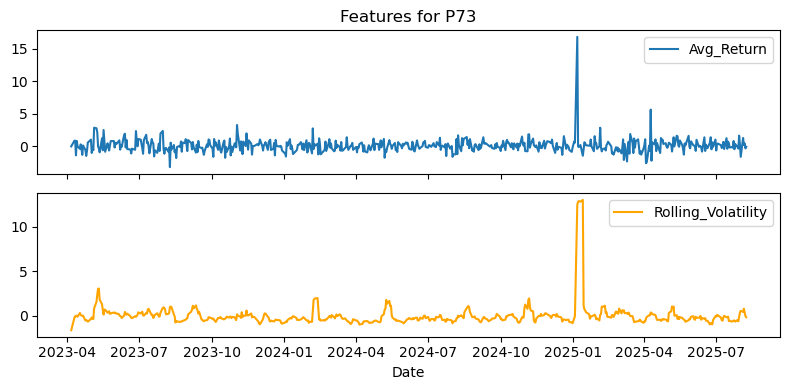

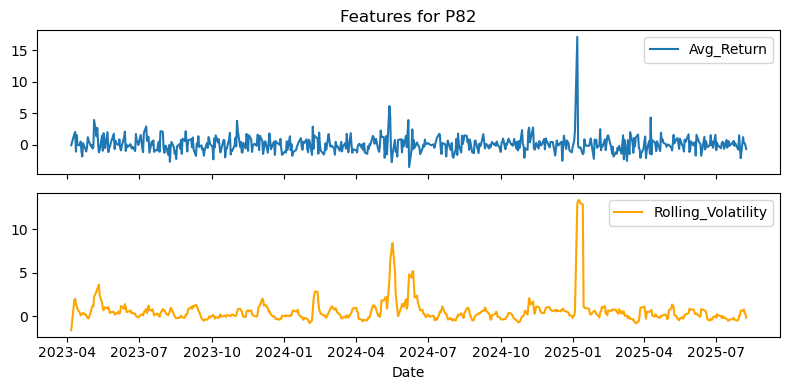

In [244]:
import matplotlib.pyplot as plt

for pid in case_ids:
    df_p = portfolio_df[portfolio_df['Portfolio']==pid]
    fig, ax = plt.subplots(2,1, figsize=(8,4), sharex=True)
    ax[0].plot(df_p['Date'], df_p['Avg_Return'], label='Avg_Return')
    ax[1].plot(df_p['Date'], df_p['Rolling_Volatility'], label='Rolling_Volatility', color='orange')
    ax[0].set_title(f"Features for {pid}")
    ax[1].set_xlabel("Date")
    ax[0].legend(); ax[1].legend()
    plt.tight_layout()
    plt.show()

### Ranking Hybrid‐Only Portfolios by Confidence Gap to Select Case Studies

In [246]:

# 1) Compute all anomaly probabilities from the hybrid
exp_logits    = np.exp(fused_logits_np)
probs         = exp_logits / exp_logits.sum(axis=1, keepdims=True)
hybrid_probs  = probs[:,1]    # p_hybrid(anomaly)

# 2) Get XGBoost’s anomaly probabilities
xgb_probs     = xgb.predict_proba(X)[:,1]  # shape [100,]

# 3) Build a DataFrame for the hybrid-only vs XGB
df = pd.DataFrame({
    "Portfolio": sorted_pids,
    "HybridProb": hybrid_probs,
    "XGBProb":    xgb_probs,
})
mask = df["Portfolio"].isin(hybrid_only_vs_xgb)
df_hybrid_only = df[mask].copy()

# 4) Compute the confidence gap
df_hybrid_only["Gap"] = df_hybrid_only["HybridProb"] - df_hybrid_only["XGBProb"]

# 5) Sort descending by Gap (or by HybridProb)
df_hybrid_only = df_hybrid_only.sort_values(
    by=["Gap","HybridProb"], ascending=False
)

# 6) Show the top 5 as your most interesting case studies
top_cases = df_hybrid_only.head(5)
print(top_cases[["Portfolio","HybridProb","XGBProb","Gap"]])

   Portfolio  HybridProb   XGBProb       Gap
68       P70    0.502559  0.800708 -0.298149
85       P86    0.496074  0.899217 -0.403143
48       P52    0.507816  0.996152 -0.488336
95       P95    0.497801  0.990020 -0.492219
82       P83    0.499762  0.994261 -0.494499


In [247]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Replace these with your actual arrays for the test split:
# y_test               – true labels for test portfolios (shape [n_test,])
# hybrid_test_preds    – hybrid model’s 0/1 predictions at threshold 0.35
# xgb_test_preds       – XGBoost 0/1 predictions on the same test set
# iso_test_preds       – Isolation Forest 0/1 predictions on the same test set

model_preds = {
    'Hybrid @0.35':       hybrid_test_preds,
    'XGBoost':            xgb_test_preds,
    'Isolation Forest':   iso_test_preds
}

# Compute metrics for each model
rows = []
for name, preds in model_preds.items():
    rows.append({
        'Model':     name,
        'Accuracy':  accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds, zero_division=0),
        'Recall':    recall_score(y_test, preds, zero_division=0),
        'F1 Score':  f1_score(y_test, preds, zero_division=0),
    })

# Create a DataFrame and display
df_metrics = pd.DataFrame(rows)
df_metrics = df_metrics.set_index('Model')

print("Performance Comparison of Hybrid, XGBoost and Isolation Forest on the Test Portfolios\n")
print(df_metrics.to_markdown())

Performance Comparison of Hybrid, XGBoost and Isolation Forest on the Test Portfolios

| Model            |   Accuracy |   Precision |    Recall |   F1 Score |
|:-----------------|-----------:|------------:|----------:|-----------:|
| Hybrid @0.35     |       0.95 |    0.95     | 1         |   0.974359 |
| XGBoost          |       0.85 |    0.944444 | 0.894737  |   0.918919 |
| Isolation Forest |       0.1  |    1        | 0.0526316 |   0.1      |


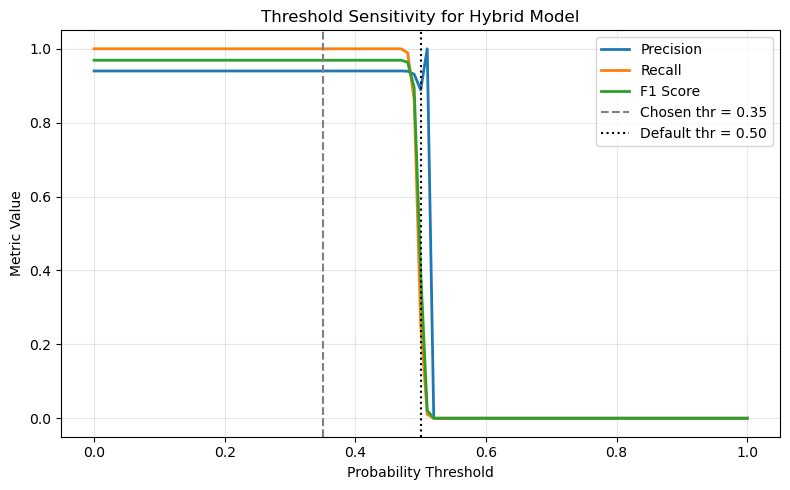

In [248]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Assume `anomaly_probs` is your array of shape (n_portfolios,)
# and `true_labels` is the corresponding binary ground‐truth array.

# 1) Define a grid of candidate thresholds
thresholds = np.linspace(0.0, 1.0, 101)

# Compute precision, recall, and F1 at each threshold
precisions = []
recalls    = []
f1s        = []

for thr in thresholds:
    preds = (anomaly_probs > thr).astype(int)
    precisions.append(precision_score(true_labels, preds, zero_division=0))
    recalls.append   (recall_score   (true_labels, preds, zero_division=0))
    f1s.append       (f1_score       (true_labels, preds, zero_division=0))

# 3) Plot the curves
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions, label="Precision", linewidth=2)
plt.plot(thresholds, recalls,    label="Recall",    linewidth=2)
plt.plot(thresholds, f1s,        label="F1 Score",   linewidth=2)

# 4) Highlight the chosen thresholds
plt.axvline(0.35, color="gray", linestyle="--", label="Chosen thr = 0.35")
plt.axvline(0.50, color="black", linestyle=":",  label="Default thr = 0.50")

plt.xlabel("Probability Threshold")
plt.ylabel("Metric Value")
plt.title("Threshold Sensitivity for Hybrid Model")
plt.legend(loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()